In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
passengers=pd.read_csv('passengers.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean Data

In [3]:
passengers['Sex'] = passengers['Sex'].map({'male':0, 'female':1})
mean=passengers['Age'].mean()
passengers.fillna({'Age':mean}, inplace=True)
passengers.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
168,169,0,1,"Baumann, Mr. John D",0,29.699118,0,0,PC 17318,25.9250,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",1,41.000000,0,5,3101295,39.6875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.000000,0,0,113572,80.0000,B28,NaN
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",1,45.000000,0,0,347073,7.7500,NaN,S


In [4]:
passengers['FirstClass']= passengers['Pclass'].apply(lambda x: 1 if x== 1 else 0)
passengers['SecondClass']= passengers['Pclass'].apply(lambda x: 1 if x== 2 else 0)
passengers.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
128,129,1,3,"Peter, Miss. Anna",1,29.699118,1,1,2668,22.3583,F E69,C,0,0
143,144,0,3,"Burke, Mr. Jeremiah",0,19.000000,0,0,365222,6.7500,NaN,Q,0,0
155,156,0,1,"Williams, Mr. Charles Duane",0,51.000000,0,1,PC 17597,61.3792,NaN,C,1,0
371,372,0,3,"Wiklund, Mr. Jakob Alfred",0,18.000000,1,0,3101267,6.4958,NaN,S,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",1,29.699118,0,0,2649,7.2250,NaN,C,0,0


### Use Correlation Matrix to identify Features that highly correlate with survival

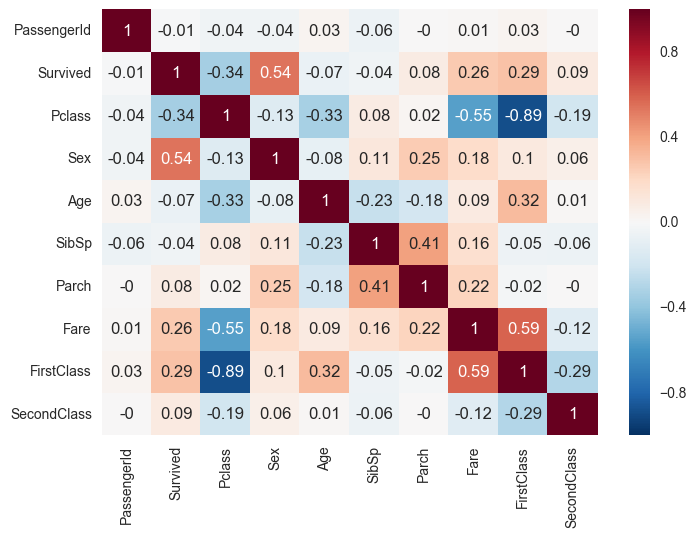

In [5]:
correlation_matrix = passengers.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [6]:
features=passengers[['Sex', 'Fare', 'FirstClass']]
target=passengers['Survived']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=13)

### Preprocess Data

In [8]:
normalize=StandardScaler()
normalize.fit_transform(x_train)
normalize.transform(x_test)

array([[ 1.38925921,  0.02745238, -0.57951264],
       [-0.71980808, -0.48495134, -0.57951264],
       [-0.71980808, -0.48414932, -0.57951264],
       [-0.71980808, -0.48463015, -0.57951264],
       [-0.71980808, -0.45097214, -0.57951264],
       [ 1.38925921,  0.37709559,  1.72558791],
       [-0.71980808, -0.45097214, -0.57951264],
       [-0.71980808, -0.4788602 , -0.57951264],
       [-0.71980808, -0.50001666, -0.57951264],
       [ 1.38925921, -0.48463015, -0.57951264],
       [-0.71980808, -0.48126435, -0.57951264],
       [-0.71980808,  0.03947309,  1.72558791],
       [ 1.38925921,  0.16601181, -0.57951264],
       [-0.71980808, -0.4788602 , -0.57951264],
       [-0.71980808, -0.49472755, -0.57951264],
       [ 1.38925921, -0.43173899, -0.57951264],
       [ 1.38925921, -0.12817647,  1.72558791],
       [-0.71980808, -0.38365613, -0.57951264],
       [-0.71980808,  0.11640568, -0.57951264],
       [-0.71980808, -0.09708225, -0.57951264],
       [-0.71980808, -0.34046233, -0.579

### Use Logistic Regression as Model

In [9]:
log_reg_model=LogisticRegression()
log_reg_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
train_score = log_reg_model.score(x_train, y_train)
test_score = log_reg_model.score(x_test, y_test).round(2)
print('Logistic Regression Accuracy is {}'.format(test_score))

Logistic Regression Accuracy is 0.82
